In [1]:
import math
import numpy as np
import pandas as pd
import tensorflow as tf
from tqdm import tqdm_notebook
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
% matplotlib inline

# Making feature dataset after concatenation

In [95]:
# Importing GSC-Features.csv file

gscFeaturesData = pd.read_csv("GSC-Features.csv")

In [69]:
gscFeaturesData.head()

,img_id,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f503,f504,f505,f506,f507,f508,f509,f510,f511,f512
0,0001a_num1.png,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0001a_num2.png,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0001a_num3.png,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0001a_num4.png,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0001a_num5.png,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [70]:
gscFeaturesData.shape

(14072, 513)

In [96]:
# Importing same_pairs.csv file

samePair = pd.read_csv("same_pairs.csv")

In [72]:
samePair.head()

,img_id_A,img_id_B,target
0,0001a_num1.png,0001a_num2.png,1
1,0001a_num1.png,0001a_num3.png,1
2,0001a_num1.png,0001a_num4.png,1
3,0001a_num1.png,0001a_num5.png,1
4,0001a_num1.png,0001b_num1.png,1


In [73]:
samePair.shape

(71531, 3)

In [74]:
print(samePair['img_id_A'].unique().shape)  # It tells the number of distinct images in img_id_A column
print(samePair['img_id_B'].unique().shape)  # It tells the number of distinct images in img_id_B column

# Both columns have 564 distinct images out of 791 images

(12539,)
(12539,)


In [97]:
# Importing diffn_pairs.csv file

diffnPair = pd.read_csv("diffn_pairs.csv")

In [76]:
diffnPair.head()

,img_id_A,img_id_B,target
0,0001a_num1.png,0002a_num1.png,0
1,0001a_num1.png,0002a_num2.png,0
2,0001a_num1.png,0002a_num3.png,0
3,0001a_num1.png,0002a_num4.png,0
4,0001a_num1.png,0002b_num1.png,0


In [77]:
diffnPair.shape

(762557, 3)

In [98]:
# To make my feature dataset, here I am taking random 2000 samples from diffnPair dataframe so that I can concatenate same pair
# and different pair along row axis.

gscFeatures = pd.concat([samePair[:20000], diffnPair[:20000]])

In [6]:
gscFeatures.head()  # We can see in the target column, series of 1's is appearing and then series of 0's

,img_id_A,img_id_B,target
0,0001a_num1.png,0001a_num2.png,1
1,0001a_num1.png,0001a_num3.png,1
2,0001a_num1.png,0001a_num4.png,1
3,0001a_num1.png,0001a_num5.png,1
4,0001a_num1.png,0001b_num1.png,1


In [80]:
gscFeatures.shape  

(4000, 3)

In [99]:
gsc = gscFeatures.values
np.random.shuffle(gsc)    
gsc

array([['0009a_num3.png', '0009c_num4.png', 1],
       ['0020a_num1.png', '0076c_num1.png', 0],
       ['0254a_num5.png', '0254c_num5.png', 1],
       ..., 
       ['0197b_num1.png', '0197b_num3.png', 1],
       ['0024a_num1.png', '0084c_num1.png', 0],
       ['0387b_num1.png', '0387c_num2.png', 1]], dtype=object)

In [82]:
# We can clearly infer from above output that hod is shuffled.

In [100]:
columnIndex = gscFeatures.columns
columnIndex

Index(['img_id_A', 'img_id_B', 'target'], dtype='object')

In [101]:
gscFeatures =  pd.DataFrame(data = gsc,columns=columnIndex)
gscFeatures.head()

,img_id_A,img_id_B,target
0,0009a_num3.png,0009c_num4.png,1
1,0020a_num1.png,0076c_num1.png,0
2,0254a_num5.png,0254c_num5.png,1
3,0125a_num5.png,0125b_num1.png,1
4,0009a_num1.png,0017a_num1.png,0


In [85]:
# To make gsc dataset after concatenation of features of image_A and image_B, we have to fetch features of image A
# and B from "gscFeaturesData" dataframe.

In [102]:
img_id_A = gscFeatures['img_id_A'].values
img_id_B = gscFeatures['img_id_B'].values

In [87]:
gscFeaturesData.head()

,img_id,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f503,f504,f505,f506,f507,f508,f509,f510,f511,f512
0,0001a_num1.png,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0001a_num2.png,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0001a_num3.png,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0001a_num4.png,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0001a_num5.png,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [103]:
# To fetch the features we have to reset the index gscFeaturesData

features = gscFeaturesData.set_index(keys='img_id')
features.head()

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,...,f503,f504,f505,f506,f507,f508,f509,f510,f511,f512
img_id,,,,,,,,,,,,,,,,,,,,,
0001a_num1.png,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0001a_num2.png,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0001a_num3.png,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0001a_num4.png,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0001a_num5.png,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [104]:
# Fetching Images_A features

img_id_A_features = features.loc[img_id_A]
img_id_A_features.head()

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,...,f503,f504,f505,f506,f507,f508,f509,f510,f511,f512
img_id,,,,,,,,,,,,,,,,,,,,,
0009a_num3.png,1,1,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
0020a_num1.png,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0254a_num5.png,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0125a_num5.png,0,1,1,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
0009a_num1.png,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [105]:
img_id_A_features.shape

(40000, 512)

In [106]:
# Fetching Images_B features

img_id_B_features = features.loc[img_id_B]
img_id_B_features.head()

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,...,f503,f504,f505,f506,f507,f508,f509,f510,f511,f512
img_id,,,,,,,,,,,,,,,,,,,,,
0009c_num4.png,1,1,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0076c_num1.png,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0254c_num5.png,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0125b_num1.png,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0017a_num1.png,1,1,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [107]:
img_id_B_features.shape

(40000, 512)

In [108]:
imageIds = gscFeatures[['img_id_A', 'img_id_B']].values
target = gscFeatures[['target']].values

In [109]:
subtractedFeatures = np.abs(img_id_A_features.values - img_id_B_features.values)
subtractedFeatures

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [110]:
subtractedFeatures = np.hstack((imageIds, subtractedFeatures, target)) 

In [111]:
subtractedFeatures

array([['0009a_num3.png', '0009c_num4.png', 0, ..., 0, 0, 1],
       ['0020a_num1.png', '0076c_num1.png', 0, ..., 0, 0, 0],
       ['0254a_num5.png', '0254c_num5.png', 0, ..., 0, 0, 1],
       ..., 
       ['0197b_num1.png', '0197b_num3.png', 0, ..., 0, 0, 1],
       ['0024a_num1.png', '0084c_num1.png', 0, ..., 0, 0, 0],
       ['0387b_num1.png', '0387c_num2.png', 0, ..., 0, 0, 1]], dtype=object)

In [112]:
subtractedFeatures.shape

(40000, 515)

In [113]:
Indexcol = ['img_id_A', 'img_id_B'] + list(img_id_A_features.columns) + ['target']

In [99]:
Indexcol

['img_id_A',
 'img_id_B',
 'f1',
 'f2',
 'f3',
 'f4',
 'f5',
 'f6',
 'f7',
 'f8',
 'f9',
 'f10',
 'f11',
 'f12',
 'f13',
 'f14',
 'f15',
 'f16',
 'f17',
 'f18',
 'f19',
 'f20',
 'f21',
 'f22',
 'f23',
 'f24',
 'f25',
 'f26',
 'f27',
 'f28',
 'f29',
 'f30',
 'f31',
 'f32',
 'f33',
 'f34',
 'f35',
 'f36',
 'f37',
 'f38',
 'f39',
 'f40',
 'f41',
 'f42',
 'f43',
 'f44',
 'f45',
 'f46',
 'f47',
 'f48',
 'f49',
 'f50',
 'f51',
 'f52',
 'f53',
 'f54',
 'f55',
 'f56',
 'f57',
 'f58',
 'f59',
 'f60',
 'f61',
 'f62',
 'f63',
 'f64',
 'f65',
 'f66',
 'f67',
 'f68',
 'f69',
 'f70',
 'f71',
 'f72',
 'f73',
 'f74',
 'f75',
 'f76',
 'f77',
 'f78',
 'f79',
 'f80',
 'f81',
 'f82',
 'f83',
 'f84',
 'f85',
 'f86',
 'f87',
 'f88',
 'f89',
 'f90',
 'f91',
 'f92',
 'f93',
 'f94',
 'f95',
 'f96',
 'f97',
 'f98',
 'f99',
 'f100',
 'f101',
 'f102',
 'f103',
 'f104',
 'f105',
 'f106',
 'f107',
 'f108',
 'f109',
 'f110',
 'f111',
 'f112',
 'f113',
 'f114',
 'f115',
 'f116',
 'f117',
 'f118',
 'f119',
 'f120',
 '

In [114]:
subtractedFeatures = pd.DataFrame(subtractedFeatures, columns = Indexcol)

In [21]:
subtractedFeatures.head()

,img_id_A,img_id_B,f1,f2,f3,f4,f5,f6,f7,f8,...,f504,f505,f506,f507,f508,f509,f510,f511,f512,target
0,0035a_num1.png,0091c_num2.png,0,1,1,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
1,0291a_num2.png,0291b_num1.png,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0130a_num1.png,0130b_num1.png,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0005a_num1.png,0039c_num3.png,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0013a_num1.png,0046c_num1.png,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [102]:
subtractedFeatures.shape

(4000, 515)

In [115]:
columnIndex = ""

for i in range(1,1025):
    columnIndex = columnIndex + 'f' + str(i) + ' '

In [116]:
ConcatenatedFeatures = np.hstack((imageIds, img_id_A_features.values, img_id_B_features.values, target)) 

In [117]:
ConcatenatedFeatures

array([['0009a_num3.png', '0009c_num4.png', 1, ..., 0, 0, 1],
       ['0020a_num1.png', '0076c_num1.png', 0, ..., 0, 0, 0],
       ['0254a_num5.png', '0254c_num5.png', 0, ..., 0, 0, 1],
       ..., 
       ['0197b_num1.png', '0197b_num3.png', 0, ..., 0, 0, 1],
       ['0024a_num1.png', '0084c_num1.png', 0, ..., 0, 0, 0],
       ['0387b_num1.png', '0387c_num2.png', 0, ..., 0, 0, 1]], dtype=object)

In [118]:
col = ['img_id_A', 'img_id_B']+columnIndex.split() + ['target']  # Index of Columns 

In [119]:
ConcatenatedFeatures = pd.DataFrame(ConcatenatedFeatures, columns = col)

In [120]:
ConcatenatedFeatures.head()

,img_id_A,img_id_B,f1,f2,f3,f4,f5,f6,f7,f8,...,f1016,f1017,f1018,f1019,f1020,f1021,f1022,f1023,f1024,target
0,0009a_num3.png,0009c_num4.png,1,1,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1,0020a_num1.png,0076c_num1.png,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0254a_num5.png,0254c_num5.png,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0125a_num5.png,0125b_num1.png,0,1,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
4,0009a_num1.png,0017a_num1.png,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [121]:
ConcatenatedFeatures.shape

(40000, 1027)

In [28]:
# Now we have both datasets ConcatenatedFeatures and subtractedFeatures
subtractedFeatures.shape

(40000, 515)

In [111]:
# Generation of target vector from ConcatenatedFeatures and subtractedFeatures for human observed data and GSC

def getTargetVector(file):
    targetVec = file['target'].values
    return targetVec


# Generation of raw data matrix from ConcatenatedFeatures and subtractedFeatures for human observed data and GSC

def rawDataMatrix(file):
    rawData = file[file.columns].values
    return rawData[:,2:len(rawData[0])-1].T

In [112]:
# Creating the training target variable(70% of target variable)

def getTrainingTarget(rawTraining,TrainingPercent = 70): 
    TrainingLen = math.ceil(len(rawTraining)*(TrainingPercent*0.01))
    t = rawTraining[:TrainingLen]
    return t 


# Making the Training dataMatrix which is 70% of input dataset

def TrainingDataMatrix(rawData, TrainingPercent = 70): 
    T_len = math.ceil(len(rawData[0])*0.01*TrainingPercent)
    d2 = rawData[:,0:T_len]
    return d2 


# Making the Validation target(15% of input dataset)

def getValTargetVector(rawData, ValPercent, TrainingCount): 
    valSize = math.ceil(len(rawData)*ValPercent*0.01)
    V_End = TrainingCount + valSize
    t =rawData[TrainingCount+1:V_End]
    return t


# Creating Validation dataMatrix(15% of input dataset)

def ValDataMatrix(rawData, ValPercent, TrainingCount): 
    valSize = math.ceil(len(rawData[0])*ValPercent*0.01)
    V_End = TrainingCount + valSize
    dataMatrix = rawData[:,TrainingCount+1:V_End]  
    return dataMatrix 

In [113]:
def getBigSigma(Data,TrainingPercent):
    BigSigma    = np.zeros((len(Data),len(Data)))
    DataT       = np.transpose(Data)
    TrainingLen = math.ceil(len(DataT)*(TrainingPercent*0.01))        
    varVect     = []
    for i in range(0,len(DataT[0])):
        vct = []
        for j in range(0,TrainingLen):
            vct.append(Data[i][j])    
        varVect.append(np.var(vct))
    
    for j in range(len(Data)):
        BigSigma[j][j] = varVect[j]+0.2  # BigSigma is getting assigned diagonally by all values of varVect
        
    
    return BigSigma

In [114]:
def getScalar(DataRow,Mu, BigSigInv):  
    R = np.subtract(DataRow,Mu)
    T = np.dot(BigSigInv,np.transpose(R))  
    L = np.dot(R,T)
    return L

def getRadialBasisOut(DataRow,Mu, BigSigInv):    
    phi_x = math.exp(-0.5*getScalar(DataRow,Mu,BigSigInv))
    return phi_x

def getPhiMatrix(Data, Mu, BigSigma, TrainingPercent = 70):
    DataT = np.transpose(Data) 
    TrainingLen = math.ceil(len(DataT)*(TrainingPercent*0.01))        
    PHI = np.zeros((TrainingLen,len(Mu))) 
    BigSigInv = np.linalg.inv(BigSigma) 
    for  C in range(len(Mu)):
        for R in range(TrainingLen):
            PHI[R][C] = getRadialBasisOut(DataT[R], Mu[C], BigSigInv)
    
    return PHI

In [115]:
def getWeightsClosedForm(PHI, T, Lambda):
    Lambda_I = np.identity(len(PHI[0]))
    for i in range(0,len(PHI[0])):
        Lambda_I[i][i] = Lambda
    PHI_T       = np.transpose(PHI)
    PHI_SQR     = np.dot(PHI_T,PHI)
    PHI_SQR_LI  = np.add(Lambda_I,PHI_SQR)
    PHI_SQR_INV = np.linalg.inv(PHI_SQR_LI)
    INTER       = np.dot(PHI_SQR_INV, PHI_T)
    W           = np.dot(INTER, T)
    return W 

In [116]:
def getValTest(VAL_PHI,W):
    Y = np.dot(W,np.transpose(VAL_PHI))
    return Y


# rms = root mean square

def getErms(VAL_TEST_OUT,ValDataAct): 
    sum = 0.0
    accuracy = 0.0
    counter = 0
    for i in range (0,len(VAL_TEST_OUT)):
        sum = sum + math.pow((ValDataAct[i] - VAL_TEST_OUT[i]),2)
        if(int(np.around(VAL_TEST_OUT[i], 0)) == ValDataAct[i]):
            counter+=1
    accuracy = (float((counter*100))/float(len(VAL_TEST_OUT)))
    return (str(accuracy) + ',' +  str(math.sqrt(sum/len(VAL_TEST_OUT))))

# Preparing Dataset

In [117]:
# For concatenatedFeatures Dataset

RawTargetConcat = getTargetVector(ConcatenatedFeatures)
RawDataConcat   = rawDataMatrix(ConcatenatedFeatures)


# For subtractedFeatures Dataset 

RawTargetSubtract = getTargetVector(subtractedFeatures)
RawDataSubtract   = rawDataMatrix(subtractedFeatures)

# Preparing Training Data

In [118]:
# For concatenatedFeatures Dataset

TrainingPercent=70
TrainingTargetConcat = getTrainingTarget(RawTargetConcat,TrainingPercent)
TrainingDataConcat   = TrainingDataMatrix(RawDataConcat,TrainingPercent)
print(TrainingTargetConcat.shape)
print(TrainingDataConcat.shape)

print()
# For subtractedFeatures Dataset 

TrainingTargetSubtract = getTrainingTarget(RawTargetSubtract,TrainingPercent)
TrainingDataSubtract   = TrainingDataMatrix(RawDataSubtract,TrainingPercent)
print(TrainingTargetSubtract.shape)
print(TrainingDataSubtract.shape)

(2801,)
(1024, 2800)

(2801,)
(512, 2800)


# Preparing Validation Data

In [119]:
# For concatenatedFeatures Dataset

ValidationPercent= 15
ValDataActConcat = getValTargetVector(RawTargetConcat,ValidationPercent, (len(TrainingTargetConcat)))
ValDataConcat    = ValDataMatrix(RawDataConcat,ValidationPercent, (len(TrainingTargetConcat)))
print(ValDataActConcat.shape)
print(ValDataConcat.shape)

print()
# For subtractedFeatures Dataset 

ValDataActSubtract = getValTargetVector(RawTargetSubtract,ValidationPercent, (len(TrainingTargetSubtract)))
ValDataSubtract   = ValDataMatrix(RawDataSubtract,ValidationPercent, (len(TrainingTargetSubtract)))
print(ValDataActSubtract.shape)
print(ValDataSubtract.shape)

(599,)
(1024, 599)

(599,)
(512, 599)


# Preparing Test Data

In [120]:
# For concatenatedFeatures Dataset

TestPercent = 15
TestDataActConcat = getValTargetVector(RawTargetConcat,TestPercent, (len(TrainingTargetConcat)+len(ValDataActConcat)))
TestDataConcat = ValDataMatrix(RawDataConcat,TestPercent, (len(TrainingTargetConcat)+len(ValDataActConcat)))
print(TestDataActConcat.shape)
print(TestDataConcat.shape)

print()
# For subtractedFeatures Dataset 

TestDataActSubtract = getValTargetVector(RawTargetSubtract,TestPercent, (len(TrainingTargetSubtract)+len(ValDataActSubtract)))
TestDataSubtract = ValDataMatrix(RawDataSubtract,TestPercent, (len(TrainingTargetSubtract)+len(ValDataActSubtract)))
print(TestDataActSubtract.shape)
print(TestDataSubtract.shape)

(599,)
(1024, 599)

(599,)
(512, 599)


HBox(children=(IntProgress(value=0, max=22), HTML(value='')))

Text(0.5,1,'WCSS Vs. Number of clusters M')

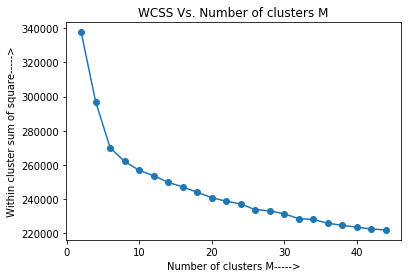

In [126]:
# For concatenatedFeatures Dataset

k_list = [2*M for M in range(1,23)]
WCSS = [] # Within cluster sum of square
for M in tqdm_notebook(k_list):
    kmeans = KMeans(n_clusters=M, random_state=0).fit(np.transpose(TrainingDataConcat))
    WCSS.append(kmeans.inertia_)

# Elbow Method
plt.plot(k_list,WCSS,'o-')
plt.xlabel("Number of clusters M----->")
plt.ylabel("Within cluster sum of square----->")
plt.title("WCSS Vs. Number of clusters M")

HBox(children=(IntProgress(value=0, max=22), HTML(value='')))

Text(0.5,1,'WCSS Vs. Number of clusters M')

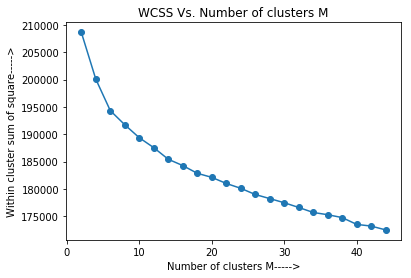

In [127]:
# For subtractedFeatures Dataset

k_list_ = [2*M for M in range(1,23)]
WCSS_ = [] # Within cluster sum of square
for M in tqdm_notebook(k_list_):
    kmeans_ = KMeans(n_clusters=M, random_state=0).fit(np.transpose(TrainingDataSubtract))
    WCSS_.append(kmeans_.inertia_)

# Elbow Method
plt.plot(k_list_,WCSS_,'o-')
plt.xlabel("Number of clusters M----->")
plt.ylabel("Within cluster sum of square----->")
plt.title("WCSS Vs. Number of clusters M")

# Closed form Solution

In [121]:
C_Lambda = 0.3
TrainingPercent = 70
ValidationPercent = 15
TestPercent = 15


# For concatenatedFeatures Dataset

kmeans = KMeans(n_clusters=7, random_state=0).fit(np.transpose(TrainingDataConcat))

Mu_c = kmeans.cluster_centers_
BigSigmaConcat      = getBigSigma(RawDataConcat, TrainingPercent)
TRAINING_PHI_Concat = getPhiMatrix(RawDataConcat, Mu_c, BigSigmaConcat, TrainingPercent)
W_Concat            = getWeightsClosedForm(TRAINING_PHI_Concat,TrainingTargetConcat,(C_Lambda)) 
TEST_PHI_Concat     = getPhiMatrix(TestDataConcat, Mu_c, BigSigmaConcat,100) 
VAL_PHI_Concat      = getPhiMatrix(ValDataConcat, Mu_c, BigSigmaConcat,100)


# For subtractedFeatures Dataset 

kmeans_ = KMeans(n_clusters=14, random_state=0).fit(np.transpose(TrainingDataSubtract))

Mu_ = kmeans_.cluster_centers_
BigSigmaSubtract      = getBigSigma(RawDataSubtract, TrainingPercent)
TRAINING_PHI_Subtract = getPhiMatrix(RawDataSubtract, Mu_, BigSigmaSubtract, TrainingPercent)
W_Subtract            = getWeightsClosedForm(TRAINING_PHI_Subtract,TrainingTargetSubtract,(C_Lambda)) 
TEST_PHI_Subtract     = getPhiMatrix(TestDataSubtract, Mu_, BigSigmaSubtract,100) 
VAL_PHI_Subtract      = getPhiMatrix(ValDataSubtract, Mu_, BigSigmaSubtract,100)

In [123]:
# For concatenatedFeatures Dataset

print(Mu_c.shape)
print(BigSigmaConcat.shape)
print(TRAINING_PHI_Concat.shape)
print(W_Concat.shape)
print(VAL_PHI_Concat.shape)
print(TEST_PHI_Concat.shape)
print()

# For subtractedFeatures Dataset 

print(Mu.shape)
print(BigSigmaSubtract.shape)
print(TRAINING_PHI_Subtract.shape)
print(W_Subtract.shape)
print(VAL_PHI_Subtract.shape)
print(TEST_PHI_Subtract.shape)

(7, 1024)
(1024, 1024)
(2801, 7)
(7,)
(599, 7)
(599, 7)

(14, 512)
(512, 512)
(2801, 14)
(14,)
(599, 14)
(599, 14)


Text(0.5,1,'Training Accuracy Vs. Lamda')

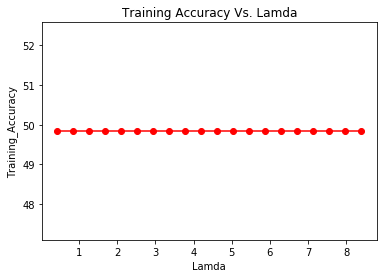

In [128]:
# To choose a value of regularization parameter(Lamda) with COncatenated training set

Lamda=[lamda*0.42 for lamda in range(1,21)]
Training_Accuracy = []
for lamda in Lamda:
  Weight = getWeightsClosedForm(TRAINING_PHI_Concat,TrainingTargetConcat,lamda) 
  TR_TEST_OUT  = getValTest(TRAINING_PHI_Concat,Weight)
  TrainingAcc= str(getErms(TR_TEST_OUT,TrainingTargetConcat))
  Training_Accuracy.append(float(TrainingAcc.split(',')[0]))
plt.plot(Lamda,Training_Accuracy,'ro-')
plt.ylabel("Training_Accuracy")
plt.xlabel("Lamda")
plt.title("Training Accuracy Vs. Lamda")

Text(0.5,1,'Training Accuracy Vs. Lamda')

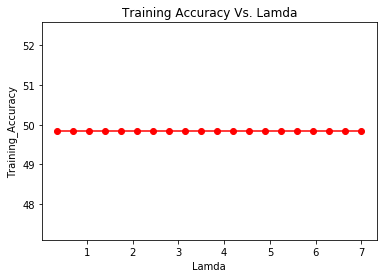

In [129]:
# To choose a value of regularization parameter(Lamda) with Subtracted training set

Lamda=[lamda*0.35 for lamda in range(1,21)]
Training_Accuracy = []
for lamda in Lamda:
  Weight = getWeightsClosedForm(TRAINING_PHI_Subtract,TrainingTargetSubtract,lamda) 
  TR_TEST_OUT  = getValTest(TRAINING_PHI_Subtract,Weight)
  TrainingAcc= str(getErms(TR_TEST_OUT,TrainingTargetSubtract))
  Training_Accuracy.append(float(TrainingAcc.split(',')[0]))
plt.plot(Lamda,Training_Accuracy,'ro-')
plt.ylabel("Training_Accuracy")
plt.xlabel("Lamda")
plt.title("Training Accuracy Vs. Lamda")

# Finding Erms on training, validation and test set

In [124]:
# For concatenatedFeatures Dataset

TR_TEST_OUT_Concat  = getValTest(TRAINING_PHI_Concat,W_Concat)
VAL_TEST_OUT_Concat = getValTest(VAL_PHI_Concat,W_Concat)
TEST_OUT_Concat     = getValTest(TEST_PHI_Concat,W_Concat)

TrainingAccuracy_Concat   = str(getErms(TR_TEST_OUT_Concat,TrainingTargetConcat))
ValidationAccuracy_Concat = str(getErms(VAL_TEST_OUT_Concat,ValDataActConcat))
TestAccuracy_Concat       = str(getErms(TEST_OUT_Concat,TestDataActConcat))

# For subtractedFeatures Dataset 

TR_TEST_OUT_Subtract  = getValTest(TRAINING_PHI_Subtract,W_Subtract)
VAL_TEST_OUT_Subtract = getValTest(VAL_PHI_Subtract,W_Subtract)
TEST_OUT_Subtract     = getValTest(TEST_PHI_Subtract,W_Subtract)

TrainingAccuracy_Subtract   = str(getErms(TR_TEST_OUT_Subtract,TrainingTargetSubtract))
ValidationAccuracy_Subtract = str(getErms(VAL_TEST_OUT_Subtract,ValDataActSubtract))
TestAccuracy_Subtract      = str(getErms(TEST_OUT_Subtract,TestDataActSubtract))

In [125]:
# For concatenatedFeatures Dataset

print("# Accuracy of concatenatedFeatures Dataset\n")

print("Training accuracy   = " + TrainingAccuracy_Concat.split(',')[0])
print("Validation accuracy = " +  ValidationAccuracy_Concat.split(',')[0])
print("Test accuracy       = " +  TestAccuracy_Concat.split(',')[0]+"\n")

print ("E_rms Training   = " + str(float(TrainingAccuracy_Concat.split(',')[1])))
print ("E_rms Validation = " + str(float(ValidationAccuracy_Concat.split(',')[1])))
print ("E_rms Testing    = " + str(float(TestAccuracy_Concat.split(',')[1]))+"\n\n\n")


# For subtractedFeatures Dataset 

print("# Accuracy of subtractedFeatures Dataset\n")

print("Training accuracy   = " + TrainingAccuracy_Subtract.split(',')[0])
print("Validation accuracy = " +  ValidationAccuracy_Subtract.split(',')[0])
print("Test accuracy       = " +  TestAccuracy_Subtract.split(',')[0]+"\n")

print ("E_rms Training   = " + str(float(TrainingAccuracy_Subtract.split(',')[1])))
print ("E_rms Validation = " + str(float(ValidationAccuracy_Subtract.split(',')[1])))
print ("E_rms Testing    = " + str(float(TestAccuracy_Subtract.split(',')[1])))

# Accuracy of concatenatedFeatures Dataset

Training accuracy   = 49.839343091752944
Validation accuracy = 49.08180300500835
Test accuracy       = 51.75292153589316

E_rms Training   = 0.7082418859983294
E_rms Validation = 0.713569877412098
E_rms Testing    = 0.6946011694786214



# Accuracy of subtractedFeatures Dataset

Training accuracy   = 49.839343091752944
Validation accuracy = 49.08180300500835
Test accuracy       = 51.75292153589316

E_rms Training   = 0.7082418859983294
E_rms Validation = 0.713569877412098
E_rms Testing    = 0.6946011694786214


# Gradient Descent Solution

In [130]:
# For Concatenated features dataset

W_Now        = np.dot(220, W_Concat) # It intializes with random value
La           = 2 # Lamda
learningRate = 0.01
L_Erms_Val   = []
L_Erms_TR    = []
L_Erms_Test  = []
W_Mat        = []

for i in range(0,400):
    
    #print ('---------Iteration: ' + str(i) + '--------------')
    Delta_E_D     = -np.dot((TrainingTargetConcat[i] - np.dot(np.transpose(W_Now),TRAINING_PHI_Concat[i])),TRAINING_PHI_Concat[i])
    La_Delta_E_W  = np.dot(La,W_Now)
    Delta_E       = np.add(Delta_E_D,La_Delta_E_W)    
    Delta_W       = -np.dot(learningRate,Delta_E)
    W_T_Next      = W_Now + Delta_W
    W_Now         = W_T_Next
    
    #-----------------TrainingData Accuracy---------------------#
    TR_TEST_OUT   = getValTest(TRAINING_PHI_Concat,W_T_Next) 
    Erms_TR       = getErms(TR_TEST_OUT,TrainingTargetConcat)
    L_Erms_TR.append(float(Erms_TR.split(',')[1]))
    
    #-----------------ValidationData Accuracy---------------------#
    VAL_TEST_OUT  = getValTest(VAL_PHI_Concat,W_T_Next) 
    Erms_Val      = getErms(VAL_TEST_OUT,ValDataActConcat)
    L_Erms_Val.append(float(Erms_Val.split(',')[1]))
    
    #-----------------TestingData Accuracy---------------------#
    TEST_OUT      = getValTest(TEST_PHI_Concat,W_T_Next) 
    Erms_Test = getErms(TEST_OUT,TestDataActConcat)
    L_Erms_Test.append(float(Erms_Test.split(',')[1]))

Text(0.5,1,'Training_Erms Vs. Learningrate')

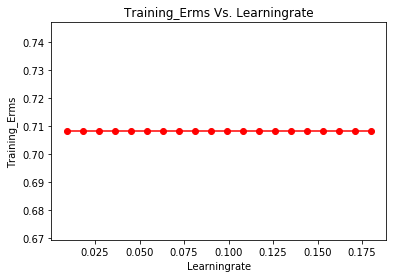

In [131]:
# To find the learning rate for Concatenated features

Learningrate = [0.009*i for i in range(1,21)]
Training_Erms=[]
for l in Learningrate:
    
    La_Delta_E_W  = np.dot(La,W_Now)
    Delta_E       = np.add(Delta_E_D,La_Delta_E_W)    
    Delta_W       = -np.dot(l,Delta_E)
    W_T_Next      = W_Now + Delta_W
    W_Now         = W_T_Next
    
    TR_TEST_OUT   = getValTest(TRAINING_PHI_Concat,W_T_Next) 
    Erms_TR       = getErms(TR_TEST_OUT,TrainingTargetConcat)
    Training_Erms.append(float(Erms_TR.split(',')[1]))

    
plt.plot(Learningrate,Training_Erms,'ro-')
plt.ylabel("Training_Erms")
plt.xlabel("Learningrate")
plt.title("Training_Erms Vs. Learningrate")

In [132]:
print ('----------Gradient Descent Solution for Concatenated features--------------------')
print("Accuracy")
print("Training accuracy   = " +TrainingAccuracy_Concat.split(',')[0])
print("Validation accuracy = " + ValidationAccuracy_Concat.split(',')[0])
print("Test accuracy       = " + TestAccuracy_Concat.split(',')[0]+"\n")
print ("E_rms Training   = " + str(np.around(min(L_Erms_TR),5)))
print ("E_rms Validation = " + str(np.around(min(L_Erms_Val),5)))
print ("E_rms Testing    = " + str(np.around(min(L_Erms_Test),5)))

----------Gradient Descent Solution for Concatenated features--------------------
Accuracy
Training accuracy   = 49.839343091752944
Validation accuracy = 49.08180300500835
Test accuracy       = 51.75292153589316

E_rms Training   = 0.70824
E_rms Validation = 0.71357
E_rms Testing    = 0.6946


In [136]:
# For Subtracted features dataset

W_Now_       = np.dot(220, W_Subtract) # It intializes with random value
La           = 2 # Lamda
learningRate = 0.01
L_Erms_Val   = []
L_Erms_TR    = []
L_Erms_Test  = []
W_Mat        = []

for i in range(0,400):
    
    #print ('---------Iteration: ' + str(i) + '--------------')
    Delta_E_D     = -np.dot((TrainingTargetSubtract[i] - np.dot(np.transpose(W_Now_),TRAINING_PHI_Subtract[i])),TRAINING_PHI_Subtract[i])
    La_Delta_E_W  = np.dot(La,W_Now_)
    Delta_E       = np.add(Delta_E_D,La_Delta_E_W)    
    Delta_W       = -np.dot(learningRate,Delta_E)
    W_T_Next      = W_Now_ + Delta_W
    W_Now_         = W_T_Next
    
    #-----------------TrainingData Accuracy---------------------#
    TR_TEST_OUT   = getValTest(TRAINING_PHI_Subtract,W_T_Next) 
    Erms_TR       = getErms(TR_TEST_OUT,TrainingTargetSubtract)
    L_Erms_TR.append(float(Erms_TR.split(',')[1]))
    
    #-----------------ValidationData Accuracy---------------------#
    VAL_TEST_OUT  = getValTest(VAL_PHI_Subtract,W_T_Next) 
    Erms_Val      = getErms(VAL_TEST_OUT,ValDataActSubtract)
    L_Erms_Val.append(float(Erms_Val.split(',')[1]))
    
    #-----------------TestingData Accuracy---------------------#
    TEST_OUT      = getValTest(TEST_PHI_Subtract,W_T_Next) 
    Erms_Test = getErms(TEST_OUT,TestDataActSubtract)
    L_Erms_Test.append(float(Erms_Test.split(',')[1]))

Text(0.5,1,'Training_Erms Vs. Learningrate')

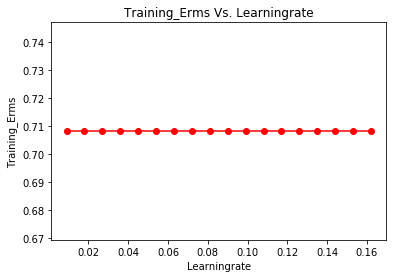

In [137]:
# To find the learning rate for Subtracted features

Learningrate = [0.009*i for i in range(1,19)]
Training_Erms=[]
for l in Learningrate:
    
    La_Delta_E_W  = np.dot(La,W_Now)
    Delta_E       = np.add(Delta_E_D,La_Delta_E_W)    
    Delta_W       = -np.dot(l,Delta_E)
    W_T_Next      = W_Now + Delta_W
    W_Now         = W_T_Next
    
    TR_TEST_OUT   = getValTest(TRAINING_PHI_Subtract,W_T_Next) 
    Erms_TR       = getErms(TR_TEST_OUT,TrainingTargetSubtract)
    Training_Erms.append(float(Erms_TR.split(',')[1]))

    
plt.plot(Learningrate,Training_Erms,'ro-')
plt.ylabel("Training_Erms")
plt.xlabel("Learningrate")
plt.title("Training_Erms Vs. Learningrate")

In [138]:
print ('----------Gradient Descent Solution for Subtracted features--------------------')
print("Accuracy")
print("Training accuracy   = " +TrainingAccuracy_Subtract.split(',')[0])
print("Validation accuracy = " + ValidationAccuracy_Subtract.split(',')[0])
print("Test accuracy       = " + TestAccuracy_Subtract.split(',')[0]+"\n")
print ("E_rms Training   = " + str(np.around(min(L_Erms_TR),5)))
print ("E_rms Validation = " + str(np.around(min(L_Erms_Val),5)))
print ("E_rms Testing    = " + str(np.around(min(L_Erms_Test),5)))

----------Gradient Descent Solution for Subtracted features--------------------
Accuracy
Training accuracy   = 49.839343091752944
Validation accuracy = 49.08180300500835
Test accuracy       = 51.75292153589316

E_rms Training   = 0.70824
E_rms Validation = 0.71357
E_rms Testing    = 0.6946


# Logistic Regression

In [29]:
# We have our desirable dataset ConcatenaatedFeatures and SubtractedFearures

In [122]:
ConcatenatedFeatures.head()

,img_id_A,img_id_B,f1,f2,f3,f4,f5,f6,f7,f8,...,f1016,f1017,f1018,f1019,f1020,f1021,f1022,f1023,f1024,target
0,0009a_num3.png,0009c_num4.png,1,1,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1,0020a_num1.png,0076c_num1.png,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0254a_num5.png,0254c_num5.png,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0125a_num5.png,0125b_num1.png,0,1,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
4,0009a_num1.png,0017a_num1.png,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [123]:
subtractedFeatures.head()

,img_id_A,img_id_B,f1,f2,f3,f4,f5,f6,f7,f8,...,f504,f505,f506,f507,f508,f509,f510,f511,f512,target
0,0009a_num3.png,0009c_num4.png,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,1
1,0020a_num1.png,0076c_num1.png,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0254a_num5.png,0254c_num5.png,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0125a_num5.png,0125b_num1.png,0,1,1,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,1
4,0009a_num1.png,0017a_num1.png,1,1,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [124]:
Bias = pd.DataFrame(np.ones((len(ConcatenatedFeatures),1)), columns = ['Bias'])
Bias.head()

,Bias
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0


In [125]:
# For ConccatenatedFeatures

ConcatenatedFeatures_ = pd.concat([Bias, ConcatenatedFeatures[ConcatenatedFeatures.columns[2:-1]]], axis=1)
ConcatenatedFeatures_.shape

(40000, 1025)

In [126]:
ConcatenatedFeatures_.head()

,Bias,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f1015,f1016,f1017,f1018,f1019,f1020,f1021,f1022,f1023,f1024
0,1.0,1,1,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,1.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.0,0,1,1,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
4,1.0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [127]:
# For SubtractedFeatures
subtractedFeatures_ = pd.concat([Bias, subtractedFeatures[subtractedFeatures.columns[2:-1]]], axis=1)
subtractedFeatures_.shape

(40000, 513)

In [128]:
subtractedFeatures_.head()

,Bias,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f503,f504,f505,f506,f507,f508,f509,f510,f511,f512
0,1.0,0,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,1.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1.0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.0,0,1,1,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
4,1.0,1,1,1,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0


In [129]:
# For concatenatedfeatures
weight = np.zeros(1025)  # Bceause 1025 is the number of features including bias

In [130]:
def sigmoidFunction(inputData, weight):
    sigmoid = 1/(np.exp(-1 * np.matmul(inputData, weight)))
    return sigmoid

In [131]:
def cost_function(m,data,weight,Target):
    J = 1/m*(-1*Target.T.dot(np.log(sigmoidFunction(data,weight))) - (1 - Target).T.dot(np.log(1-sigmoidFunction(data,weight))))
    return J

In [132]:
def gd(m,weight,X, Target, Learningrate): # gd stands for Gradient Descent
    cost_functionList = [0]* 100 
    for i in tqdm_notebook(range(100)):
        weight = weight - (Learningrate/m) * ( X.T.dot((sigmoidFunction(X,weight) - Target)))
        cost = cost_function(m,X,weight,Target)
        cost_functionList[i] = cost
    return weight, cost_functionList

In [133]:
# For ConcatenatedFeatures training set
m = len(ConcatenatedFeatures_) # number of training examples
Target_ = ConcatenatedFeatures['target'].values.astype(float)
TrainingPercent = int((80/100)*len(Target_))
Target = Target_[:TrainingPercent]
Learningrate = 0.004
X_ = ConcatenatedFeatures_.values.astype(float)
concatInput = X_[:TrainingPercent]
New_weight_concat, costList_concat = gd(m,weight,concatInput,Target,Learningrate)

HBox(children=(IntProgress(value=0), HTML(value='')))

In [134]:
# For subtractedFeatures

weight_subtract = np.zeros(513)  # Bceause 513 is the number of features including bias

In [135]:
# For subtractedFeatures training set

Learningrate_ = 0.055
X_subtract = subtractedFeatures_.values.astype(float)
subtractInput = X_subtract[:TrainingPercent]
New_weight_subtract, costList_subtract = gd(m,weight_subtract,subtractInput,Target,Learningrate_)

HBox(children=(IntProgress(value=0), HTML(value='')))

C:\Users\abhi\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: RuntimeWarning: invalid value encountered in log
  from ipykernel import kernelapp as app


In [136]:
# For concatenated test set

predict_concat = sigmoidFunction(X_[TrainingPercent+1:],New_weight_concat)

# For subtracted test set

predict_subtract = sigmoidFunction(X_subtract[TrainingPercent+1:],New_weight_subtract)

In [137]:
def estimatedOutput(predict,Target):
    right = 0
    wrong = 0
    
    for i in range(len(Target)):
        if np.around(predict[i]) == Target[i]:
            right += 1
        else:
            wrong +=1
    return right, wrong

In [138]:
# For concatenatedfeatures
Target_concat = Target_[TrainingPercent+1:]
Right, Wrong = estimatedOutput(predict_concat,Target_concat)
print("Accuracy is " + str(Right/len(Target_concat)*100))
print("Error is " + str(Wrong/len(Target_concat)*100))


print()
# For subtractedfeatures

Target_subtract = Target_[TrainingPercent+1:]
Right, Wrong = estimatedOutput(predict_subtract,Target_subtract)
print("Accuracy is " + str(Right/len(Target_subtract)*100))
print("Error is " + str(Wrong/len(Target_subtract)*100))

Accuracy is 73.23415426928366
Error is 26.765845730716343

Accuracy is 81.41017627203401
Error is 18.589823727965996


Text(0.5,1,'Cost funcion J Vs. Iterations')

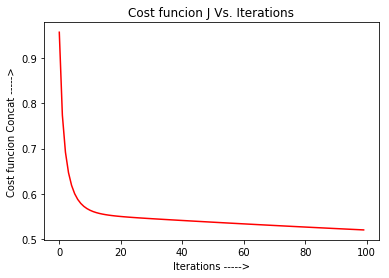

In [63]:
# For Concatenated set

Iterations = list(range(100))
plt.plot(Iterations,costList_concat,'r-')
plt.ylabel("Cost funcion Concat ----->")
plt.xlabel("Iterations ----->")
plt.title("Cost funcion J Vs. Iterations")

Text(0.5,1,'Cost funcion J Vs. Iterations')

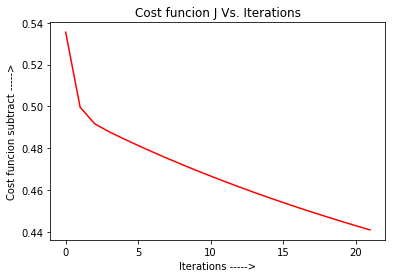

In [64]:
# For Subtracted set

Iterations = list(range(100))
plt.plot(Iterations,costList_subtract,'r-')
plt.ylabel("Cost funcion subtract ----->")
plt.xlabel("Iterations ----->")
plt.title("Cost funcion J Vs. Iterations")

# Artificial Neural Network

In [139]:
ConcatenatedFeatures.head()

,img_id_A,img_id_B,f1,f2,f3,f4,f5,f6,f7,f8,...,f1016,f1017,f1018,f1019,f1020,f1021,f1022,f1023,f1024,target
0,0009a_num3.png,0009c_num4.png,1,1,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1,0020a_num1.png,0076c_num1.png,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0254a_num5.png,0254c_num5.png,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0125a_num5.png,0125b_num1.png,0,1,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
4,0009a_num1.png,0017a_num1.png,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [140]:
subtractedFeatures.head()

,img_id_A,img_id_B,f1,f2,f3,f4,f5,f6,f7,f8,...,f504,f505,f506,f507,f508,f509,f510,f511,f512,target
0,0009a_num3.png,0009c_num4.png,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,1
1,0020a_num1.png,0076c_num1.png,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0254a_num5.png,0254c_num5.png,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0125a_num5.png,0125b_num1.png,0,1,1,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,1
4,0009a_num1.png,0017a_num1.png,1,1,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


# Training The Model

In [141]:
from sklearn.model_selection import train_test_split

In [142]:
# For concatenated set

X_train_concat, X_test_concat, y_train_concat, y_test_concat = train_test_split(ConcatenatedFeatures_.values[:,1:], ConcatenatedFeatures['target'].values,test_size =0.2,random_state=0)

In [143]:
# For subtracted set

X_train_subtract, X_test_subtract, y_train_subtract, y_test_subtract = train_test_split(subtractedFeatures_.values[:,1:], subtractedFeatures['target'].values,test_size =0.2,random_state=0)

In [144]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [145]:
# Initialising the ANN

In [146]:
classifier_concat = Sequential()
classifier_subtract =Sequential()

In [147]:
# Adding the input layer and the first hidden layer

In [148]:
# For concatenated dataset

classifier_concat.add(Dense(units=128, kernel_initializer='uniform',activation='relu',input_dim=1024))

# For subtracted dataset

classifier_subtract.add(Dense(units=128, kernel_initializer='uniform',activation='relu',input_dim=512))

In [149]:
# For concatenated dataset

classifier_concat.add(Dense(units=1, kernel_initializer='uniform',activation='sigmoid'))

# For subtracted dataset

classifier_subtract.add(Dense(units=1, kernel_initializer='uniform',activation='sigmoid'))

In [150]:
# Compiling the ANN

In [151]:
# For concatenated dataset

classifier_concat.compile(optimizer='sgd',loss ='binary_crossentropy', metrics=['accuracy'])

# For subtracted dataset

classifier_subtract.compile(optimizer='sgd',loss ='binary_crossentropy', metrics=['accuracy'])

In [152]:
# fitting the ANN to the Training set

# For concatenated Dataset
classifier_concat.fit(X_train_concat,y_train_concat,batch_size=128,epochs=50)

Epoch 1/50
32000/32000 [==============================] - ETA: 49:27 - loss: 0.7006 - acc: 0.50 - ETA: 24:49 - loss: 0.6981 - acc: 0.50 - ETA: 12:22 - loss: 0.6988 - acc: 0.51 - ETA: 8:12 - loss: 0.6994 - acc: 0.4987 - ETA: 6:08 - loss: 0.6983 - acc: 0.496 - ETA: 4:53 - loss: 0.6980 - acc: 0.500 - ETA: 4:03 - loss: 0.6977 - acc: 0.499 - ETA: 3:28 - loss: 0.6964 - acc: 0.508 - ETA: 3:01 - loss: 0.6963 - acc: 0.511 - ETA: 2:40 - loss: 0.6955 - acc: 0.517 - ETA: 2:16 - loss: 0.6961 - acc: 0.512 - ETA: 2:03 - loss: 0.6956 - acc: 0.511 - ETA: 1:48 - loss: 0.6951 - acc: 0.514 - ETA: 1:44 - loss: 0.6951 - acc: 0.513 - ETA: 1:33 - loss: 0.6948 - acc: 0.515 - ETA: 1:27 - loss: 0.6947 - acc: 0.514 - ETA: 1:18 - loss: 0.6943 - acc: 0.518 - ETA: 1:14 - loss: 0.6940 - acc: 0.518 - ETA: 1:08 - loss: 0.6941 - acc: 0.516 - ETA: 1:02 - loss: 0.6939 - acc: 0.519 - ETA: 59s - loss: 0.6936 - acc: 0.521 - ETA: 55s - loss: 0.6933 - acc: 0.52 - ETA: 52s - loss: 0.6933 - acc: 0.52 - ETA: 49s - loss: 0.6931 - 

32000/32000 [==============================] - ETA: 5s - loss: 0.2709 - acc: 0.960 - ETA: 6s - loss: 0.3225 - acc: 0.919 - ETA: 6s - loss: 0.3238 - acc: 0.926 - ETA: 6s - loss: 0.3187 - acc: 0.933 - ETA: 5s - loss: 0.3197 - acc: 0.929 - ETA: 5s - loss: 0.3199 - acc: 0.928 - ETA: 5s - loss: 0.3178 - acc: 0.929 - ETA: 5s - loss: 0.3192 - acc: 0.925 - ETA: 5s - loss: 0.3191 - acc: 0.926 - ETA: 5s - loss: 0.3166 - acc: 0.927 - ETA: 5s - loss: 0.3173 - acc: 0.925 - ETA: 5s - loss: 0.3171 - acc: 0.923 - ETA: 5s - loss: 0.3182 - acc: 0.924 - ETA: 5s - loss: 0.3145 - acc: 0.927 - ETA: 5s - loss: 0.3137 - acc: 0.927 - ETA: 5s - loss: 0.3121 - acc: 0.928 - ETA: 5s - loss: 0.3108 - acc: 0.928 - ETA: 5s - loss: 0.3101 - acc: 0.929 - ETA: 4s - loss: 0.3087 - acc: 0.930 - ETA: 4s - loss: 0.3083 - acc: 0.931 - ETA: 4s - loss: 0.3084 - acc: 0.931 - ETA: 4s - loss: 0.3089 - acc: 0.931 - ETA: 4s - loss: 0.3061 - acc: 0.932 - ETA: 4s - loss: 0.3056 - acc: 0.933 - ETA: 4s - loss: 0.3051 - acc: 0.933 - ETA

32000/32000 [==============================] - ETA: 4s - loss: 0.1075 - acc: 0.976 - ETA: 4s - loss: 0.1267 - acc: 0.970 - ETA: 4s - loss: 0.1222 - acc: 0.974 - ETA: 4s - loss: 0.1282 - acc: 0.971 - ETA: 4s - loss: 0.1300 - acc: 0.973 - ETA: 4s - loss: 0.1344 - acc: 0.970 - ETA: 4s - loss: 0.1328 - acc: 0.971 - ETA: 4s - loss: 0.1299 - acc: 0.972 - ETA: 4s - loss: 0.1302 - acc: 0.972 - ETA: 4s - loss: 0.1340 - acc: 0.970 - ETA: 4s - loss: 0.1361 - acc: 0.969 - ETA: 4s - loss: 0.1350 - acc: 0.971 - ETA: 4s - loss: 0.1329 - acc: 0.971 - ETA: 4s - loss: 0.1332 - acc: 0.971 - ETA: 4s - loss: 0.1328 - acc: 0.971 - ETA: 4s - loss: 0.1317 - acc: 0.972 - ETA: 4s - loss: 0.1310 - acc: 0.972 - ETA: 4s - loss: 0.1308 - acc: 0.972 - ETA: 4s - loss: 0.1308 - acc: 0.972 - ETA: 4s - loss: 0.1320 - acc: 0.972 - ETA: 4s - loss: 0.1327 - acc: 0.972 - ETA: 3s - loss: 0.1343 - acc: 0.971 - ETA: 3s - loss: 0.1340 - acc: 0.972 - ETA: 3s - loss: 0.1334 - acc: 0.972 - ETA: 3s - loss: 0.1338 - acc: 0.972 - ETA

32000/32000 [==============================] - ETA: 5s - loss: 0.0871 - acc: 0.976 - ETA: 5s - loss: 0.0946 - acc: 0.980 - ETA: 5s - loss: 0.0932 - acc: 0.981 - ETA: 5s - loss: 0.0948 - acc: 0.980 - ETA: 5s - loss: 0.0985 - acc: 0.979 - ETA: 5s - loss: 0.0935 - acc: 0.981 - ETA: 5s - loss: 0.0946 - acc: 0.981 - ETA: 5s - loss: 0.0932 - acc: 0.981 - ETA: 4s - loss: 0.0973 - acc: 0.980 - ETA: 4s - loss: 0.0959 - acc: 0.980 - ETA: 4s - loss: 0.0939 - acc: 0.981 - ETA: 4s - loss: 0.0941 - acc: 0.981 - ETA: 4s - loss: 0.0944 - acc: 0.981 - ETA: 4s - loss: 0.0952 - acc: 0.981 - ETA: 4s - loss: 0.0954 - acc: 0.981 - ETA: 4s - loss: 0.0940 - acc: 0.981 - ETA: 4s - loss: 0.0940 - acc: 0.981 - ETA: 4s - loss: 0.0938 - acc: 0.981 - ETA: 4s - loss: 0.0943 - acc: 0.981 - ETA: 4s - loss: 0.0939 - acc: 0.981 - ETA: 4s - loss: 0.0930 - acc: 0.982 - ETA: 4s - loss: 0.0931 - acc: 0.981 - ETA: 4s - loss: 0.0934 - acc: 0.981 - ETA: 3s - loss: 0.0926 - acc: 0.981 - ETA: 3s - loss: 0.0923 - acc: 0.981 - ETA

32000/32000 [==============================] - ETA: 4s - loss: 0.0474 - acc: 1.000 - ETA: 4s - loss: 0.0744 - acc: 0.984 - ETA: 4s - loss: 0.0701 - acc: 0.986 - ETA: 4s - loss: 0.0704 - acc: 0.985 - ETA: 4s - loss: 0.0658 - acc: 0.987 - ETA: 4s - loss: 0.0636 - acc: 0.988 - ETA: 4s - loss: 0.0641 - acc: 0.987 - ETA: 4s - loss: 0.0660 - acc: 0.987 - ETA: 4s - loss: 0.0679 - acc: 0.986 - ETA: 4s - loss: 0.0699 - acc: 0.986 - ETA: 3s - loss: 0.0713 - acc: 0.986 - ETA: 3s - loss: 0.0718 - acc: 0.985 - ETA: 3s - loss: 0.0726 - acc: 0.985 - ETA: 3s - loss: 0.0723 - acc: 0.985 - ETA: 3s - loss: 0.0725 - acc: 0.984 - ETA: 3s - loss: 0.0733 - acc: 0.984 - ETA: 3s - loss: 0.0745 - acc: 0.983 - ETA: 3s - loss: 0.0751 - acc: 0.983 - ETA: 3s - loss: 0.0761 - acc: 0.983 - ETA: 3s - loss: 0.0768 - acc: 0.982 - ETA: 3s - loss: 0.0765 - acc: 0.983 - ETA: 3s - loss: 0.0760 - acc: 0.983 - ETA: 3s - loss: 0.0758 - acc: 0.983 - ETA: 3s - loss: 0.0764 - acc: 0.983 - ETA: 3s - loss: 0.0770 - acc: 0.983 - ETA

32000/32000 [==============================] - ETA: 5s - loss: 0.0567 - acc: 0.984 - ETA: 4s - loss: 0.0656 - acc: 0.988 - ETA: 5s - loss: 0.0664 - acc: 0.985 - ETA: 5s - loss: 0.0639 - acc: 0.986 - ETA: 4s - loss: 0.0608 - acc: 0.987 - ETA: 4s - loss: 0.0558 - acc: 0.988 - ETA: 4s - loss: 0.0526 - acc: 0.990 - ETA: 4s - loss: 0.0528 - acc: 0.989 - ETA: 4s - loss: 0.0533 - acc: 0.989 - ETA: 4s - loss: 0.0560 - acc: 0.988 - ETA: 4s - loss: 0.0592 - acc: 0.987 - ETA: 4s - loss: 0.0605 - acc: 0.987 - ETA: 4s - loss: 0.0599 - acc: 0.987 - ETA: 4s - loss: 0.0613 - acc: 0.986 - ETA: 4s - loss: 0.0639 - acc: 0.986 - ETA: 4s - loss: 0.0639 - acc: 0.986 - ETA: 4s - loss: 0.0624 - acc: 0.986 - ETA: 4s - loss: 0.0625 - acc: 0.986 - ETA: 4s - loss: 0.0627 - acc: 0.987 - ETA: 4s - loss: 0.0622 - acc: 0.987 - ETA: 4s - loss: 0.0622 - acc: 0.987 - ETA: 3s - loss: 0.0614 - acc: 0.987 - ETA: 3s - loss: 0.0600 - acc: 0.987 - ETA: 3s - loss: 0.0602 - acc: 0.987 - ETA: 3s - loss: 0.0607 - acc: 0.987 - ETA

32000/32000 [==============================] - ETA: 5s - loss: 0.0586 - acc: 0.992 - ETA: 5s - loss: 0.0615 - acc: 0.986 - ETA: 5s - loss: 0.0611 - acc: 0.986 - ETA: 5s - loss: 0.0581 - acc: 0.988 - ETA: 4s - loss: 0.0573 - acc: 0.987 - ETA: 4s - loss: 0.0573 - acc: 0.988 - ETA: 4s - loss: 0.0573 - acc: 0.988 - ETA: 4s - loss: 0.0609 - acc: 0.987 - ETA: 4s - loss: 0.0628 - acc: 0.986 - ETA: 4s - loss: 0.0631 - acc: 0.986 - ETA: 4s - loss: 0.0623 - acc: 0.986 - ETA: 4s - loss: 0.0618 - acc: 0.986 - ETA: 4s - loss: 0.0615 - acc: 0.986 - ETA: 4s - loss: 0.0604 - acc: 0.986 - ETA: 4s - loss: 0.0600 - acc: 0.986 - ETA: 4s - loss: 0.0593 - acc: 0.986 - ETA: 4s - loss: 0.0605 - acc: 0.986 - ETA: 4s - loss: 0.0629 - acc: 0.986 - ETA: 4s - loss: 0.0619 - acc: 0.986 - ETA: 4s - loss: 0.0612 - acc: 0.986 - ETA: 3s - loss: 0.0618 - acc: 0.986 - ETA: 3s - loss: 0.0608 - acc: 0.987 - ETA: 3s - loss: 0.0610 - acc: 0.987 - ETA: 3s - loss: 0.0609 - acc: 0.987 - ETA: 3s - loss: 0.0603 - acc: 0.987 - ETA

32000/32000 [==============================] - ETA: 6s - loss: 0.0622 - acc: 0.984 - ETA: 5s - loss: 0.0782 - acc: 0.980 - ETA: 5s - loss: 0.0643 - acc: 0.985 - ETA: 5s - loss: 0.0563 - acc: 0.987 - ETA: 5s - loss: 0.0551 - acc: 0.988 - ETA: 5s - loss: 0.0494 - acc: 0.990 - ETA: 5s - loss: 0.0493 - acc: 0.990 - ETA: 5s - loss: 0.0498 - acc: 0.990 - ETA: 5s - loss: 0.0490 - acc: 0.990 - ETA: 5s - loss: 0.0491 - acc: 0.990 - ETA: 5s - loss: 0.0493 - acc: 0.990 - ETA: 5s - loss: 0.0494 - acc: 0.990 - ETA: 4s - loss: 0.0479 - acc: 0.990 - ETA: 4s - loss: 0.0498 - acc: 0.990 - ETA: 4s - loss: 0.0493 - acc: 0.989 - ETA: 4s - loss: 0.0484 - acc: 0.990 - ETA: 4s - loss: 0.0477 - acc: 0.990 - ETA: 4s - loss: 0.0486 - acc: 0.990 - ETA: 4s - loss: 0.0474 - acc: 0.990 - ETA: 4s - loss: 0.0484 - acc: 0.990 - ETA: 4s - loss: 0.0489 - acc: 0.989 - ETA: 4s - loss: 0.0484 - acc: 0.990 - ETA: 4s - loss: 0.0498 - acc: 0.989 - ETA: 4s - loss: 0.0494 - acc: 0.989 - ETA: 4s - loss: 0.0486 - acc: 0.990 - ETA

32000/32000 [==============================] - ETA: 4s - loss: 0.0373 - acc: 0.992 - ETA: 5s - loss: 0.0371 - acc: 0.994 - ETA: 5s - loss: 0.0407 - acc: 0.992 - ETA: 5s - loss: 0.0519 - acc: 0.988 - ETA: 4s - loss: 0.0506 - acc: 0.988 - ETA: 4s - loss: 0.0505 - acc: 0.988 - ETA: 4s - loss: 0.0511 - acc: 0.988 - ETA: 4s - loss: 0.0503 - acc: 0.989 - ETA: 4s - loss: 0.0497 - acc: 0.989 - ETA: 4s - loss: 0.0513 - acc: 0.988 - ETA: 4s - loss: 0.0508 - acc: 0.989 - ETA: 4s - loss: 0.0529 - acc: 0.988 - ETA: 4s - loss: 0.0514 - acc: 0.988 - ETA: 4s - loss: 0.0513 - acc: 0.989 - ETA: 4s - loss: 0.0521 - acc: 0.988 - ETA: 4s - loss: 0.0530 - acc: 0.988 - ETA: 4s - loss: 0.0526 - acc: 0.988 - ETA: 4s - loss: 0.0534 - acc: 0.988 - ETA: 4s - loss: 0.0529 - acc: 0.988 - ETA: 4s - loss: 0.0530 - acc: 0.988 - ETA: 3s - loss: 0.0527 - acc: 0.988 - ETA: 3s - loss: 0.0521 - acc: 0.988 - ETA: 3s - loss: 0.0514 - acc: 0.988 - ETA: 3s - loss: 0.0516 - acc: 0.988 - ETA: 3s - loss: 0.0512 - acc: 0.988 - ETA

32000/32000 [==============================] - ETA: 5s - loss: 0.0806 - acc: 0.976 - ETA: 5s - loss: 0.0461 - acc: 0.990 - ETA: 5s - loss: 0.0413 - acc: 0.992 - ETA: 5s - loss: 0.0424 - acc: 0.990 - ETA: 5s - loss: 0.0369 - acc: 0.992 - ETA: 5s - loss: 0.0443 - acc: 0.990 - ETA: 4s - loss: 0.0447 - acc: 0.990 - ETA: 4s - loss: 0.0476 - acc: 0.988 - ETA: 4s - loss: 0.0458 - acc: 0.989 - ETA: 4s - loss: 0.0455 - acc: 0.989 - ETA: 4s - loss: 0.0453 - acc: 0.990 - ETA: 4s - loss: 0.0450 - acc: 0.990 - ETA: 4s - loss: 0.0440 - acc: 0.990 - ETA: 4s - loss: 0.0432 - acc: 0.990 - ETA: 4s - loss: 0.0419 - acc: 0.991 - ETA: 4s - loss: 0.0429 - acc: 0.991 - ETA: 4s - loss: 0.0422 - acc: 0.991 - ETA: 4s - loss: 0.0416 - acc: 0.991 - ETA: 4s - loss: 0.0413 - acc: 0.991 - ETA: 4s - loss: 0.0412 - acc: 0.991 - ETA: 3s - loss: 0.0408 - acc: 0.991 - ETA: 3s - loss: 0.0416 - acc: 0.991 - ETA: 3s - loss: 0.0422 - acc: 0.990 - ETA: 3s - loss: 0.0417 - acc: 0.990 - ETA: 3s - loss: 0.0419 - acc: 0.990 - ETA

32000/32000 [==============================] - ETA: 5s - loss: 0.0233 - acc: 0.992 - ETA: 4s - loss: 0.0613 - acc: 0.984 - ETA: 4s - loss: 0.0513 - acc: 0.988 - ETA: 4s - loss: 0.0547 - acc: 0.987 - ETA: 4s - loss: 0.0510 - acc: 0.988 - ETA: 4s - loss: 0.0538 - acc: 0.986 - ETA: 4s - loss: 0.0559 - acc: 0.985 - ETA: 4s - loss: 0.0547 - acc: 0.985 - ETA: 4s - loss: 0.0526 - acc: 0.986 - ETA: 4s - loss: 0.0522 - acc: 0.986 - ETA: 4s - loss: 0.0522 - acc: 0.986 - ETA: 4s - loss: 0.0529 - acc: 0.986 - ETA: 4s - loss: 0.0519 - acc: 0.987 - ETA: 4s - loss: 0.0525 - acc: 0.986 - ETA: 4s - loss: 0.0538 - acc: 0.986 - ETA: 4s - loss: 0.0528 - acc: 0.986 - ETA: 4s - loss: 0.0525 - acc: 0.986 - ETA: 3s - loss: 0.0535 - acc: 0.986 - ETA: 3s - loss: 0.0528 - acc: 0.986 - ETA: 3s - loss: 0.0523 - acc: 0.986 - ETA: 3s - loss: 0.0508 - acc: 0.987 - ETA: 3s - loss: 0.0502 - acc: 0.987 - ETA: 3s - loss: 0.0488 - acc: 0.988 - ETA: 3s - loss: 0.0482 - acc: 0.988 - ETA: 3s - loss: 0.0479 - acc: 0.988 - ETA

32000/32000 [==============================] - ETA: 4s - loss: 0.0199 - acc: 1.000 - ETA: 5s - loss: 0.0562 - acc: 0.986 - ETA: 4s - loss: 0.0543 - acc: 0.985 - ETA: 4s - loss: 0.0459 - acc: 0.989 - ETA: 4s - loss: 0.0461 - acc: 0.989 - ETA: 4s - loss: 0.0464 - acc: 0.988 - ETA: 4s - loss: 0.0417 - acc: 0.990 - ETA: 4s - loss: 0.0417 - acc: 0.990 - ETA: 4s - loss: 0.0420 - acc: 0.990 - ETA: 4s - loss: 0.0404 - acc: 0.990 - ETA: 4s - loss: 0.0402 - acc: 0.990 - ETA: 4s - loss: 0.0405 - acc: 0.990 - ETA: 4s - loss: 0.0414 - acc: 0.990 - ETA: 4s - loss: 0.0421 - acc: 0.989 - ETA: 4s - loss: 0.0434 - acc: 0.989 - ETA: 4s - loss: 0.0428 - acc: 0.989 - ETA: 4s - loss: 0.0434 - acc: 0.989 - ETA: 4s - loss: 0.0435 - acc: 0.989 - ETA: 3s - loss: 0.0438 - acc: 0.989 - ETA: 3s - loss: 0.0437 - acc: 0.989 - ETA: 3s - loss: 0.0429 - acc: 0.989 - ETA: 3s - loss: 0.0420 - acc: 0.990 - ETA: 3s - loss: 0.0421 - acc: 0.990 - ETA: 3s - loss: 0.0421 - acc: 0.990 - ETA: 3s - loss: 0.0422 - acc: 0.990 - ETA

32000/32000 [==============================] - ETA: 6s - loss: 0.0122 - acc: 1.000 - ETA: 5s - loss: 0.0164 - acc: 0.998 - ETA: 5s - loss: 0.0204 - acc: 0.996 - ETA: 5s - loss: 0.0286 - acc: 0.993 - ETA: 5s - loss: 0.0282 - acc: 0.993 - ETA: 5s - loss: 0.0290 - acc: 0.992 - ETA: 5s - loss: 0.0310 - acc: 0.992 - ETA: 5s - loss: 0.0322 - acc: 0.991 - ETA: 5s - loss: 0.0327 - acc: 0.991 - ETA: 5s - loss: 0.0360 - acc: 0.990 - ETA: 5s - loss: 0.0369 - acc: 0.990 - ETA: 5s - loss: 0.0368 - acc: 0.990 - ETA: 5s - loss: 0.0377 - acc: 0.990 - ETA: 5s - loss: 0.0371 - acc: 0.990 - ETA: 4s - loss: 0.0362 - acc: 0.991 - ETA: 4s - loss: 0.0368 - acc: 0.991 - ETA: 4s - loss: 0.0380 - acc: 0.990 - ETA: 4s - loss: 0.0385 - acc: 0.990 - ETA: 4s - loss: 0.0395 - acc: 0.990 - ETA: 4s - loss: 0.0389 - acc: 0.990 - ETA: 4s - loss: 0.0395 - acc: 0.990 - ETA: 4s - loss: 0.0393 - acc: 0.990 - ETA: 4s - loss: 0.0389 - acc: 0.990 - ETA: 4s - loss: 0.0378 - acc: 0.991 - ETA: 4s - loss: 0.0380 - acc: 0.991 - ETA

In [153]:
# fitting the ANN to the Training set

# For subtracted Dataset
classifier_subtract.fit(X_train_subtract,y_train_subtract,batch_size=24,epochs=50)

Epoch 1/50
32000/32000 [==============================] - ETA: 10:23:52 - loss: 0.7018 - acc: 0.458 - ETA: 44:12 - loss: 0.6978 - acc: 0.4702  - ETA: 25:38 - loss: 0.6959 - acc: 0.49 - ETA: 17:28 - loss: 0.6935 - acc: 0.51 - ETA: 13:30 - loss: 0.6918 - acc: 0.52 - ETA: 11:11 - loss: 0.6908 - acc: 0.53 - ETA: 9:32 - loss: 0.6886 - acc: 0.5417 - ETA: 7:57 - loss: 0.6887 - acc: 0.530 - ETA: 7:04 - loss: 0.6881 - acc: 0.529 - ETA: 6:16 - loss: 0.6873 - acc: 0.531 - ETA: 5:38 - loss: 0.6869 - acc: 0.532 - ETA: 5:09 - loss: 0.6869 - acc: 0.530 - ETA: 4:42 - loss: 0.6860 - acc: 0.534 - ETA: 4:17 - loss: 0.6853 - acc: 0.538 - ETA: 4:01 - loss: 0.6847 - acc: 0.540 - ETA: 3:42 - loss: 0.6841 - acc: 0.542 - ETA: 3:23 - loss: 0.6826 - acc: 0.545 - ETA: 3:09 - loss: 0.6819 - acc: 0.543 - ETA: 2:55 - loss: 0.6813 - acc: 0.544 - ETA: 2:43 - loss: 0.6809 - acc: 0.543 - ETA: 2:34 - loss: 0.6803 - acc: 0.545 - ETA: 2:26 - loss: 0.6797 - acc: 0.547 - ETA: 2:17 - loss: 0.6788 - acc: 0.551 - ETA: 2:10 - lo

32000/32000 [==============================] - ETA: 14s - loss: 0.3480 - acc: 0.83 - ETA: 6s - loss: 0.3464 - acc: 0.8542 - ETA: 6s - loss: 0.3531 - acc: 0.853 - ETA: 6s - loss: 0.3607 - acc: 0.848 - ETA: 6s - loss: 0.3538 - acc: 0.855 - ETA: 6s - loss: 0.3441 - acc: 0.859 - ETA: 6s - loss: 0.3412 - acc: 0.858 - ETA: 5s - loss: 0.3437 - acc: 0.855 - ETA: 5s - loss: 0.3427 - acc: 0.856 - ETA: 5s - loss: 0.3453 - acc: 0.852 - ETA: 5s - loss: 0.3413 - acc: 0.855 - ETA: 5s - loss: 0.3390 - acc: 0.856 - ETA: 5s - loss: 0.3409 - acc: 0.854 - ETA: 5s - loss: 0.3396 - acc: 0.855 - ETA: 5s - loss: 0.3377 - acc: 0.855 - ETA: 5s - loss: 0.3406 - acc: 0.854 - ETA: 5s - loss: 0.3394 - acc: 0.853 - ETA: 5s - loss: 0.3391 - acc: 0.853 - ETA: 5s - loss: 0.3363 - acc: 0.855 - ETA: 5s - loss: 0.3356 - acc: 0.855 - ETA: 5s - loss: 0.3357 - acc: 0.855 - ETA: 5s - loss: 0.3361 - acc: 0.854 - ETA: 5s - loss: 0.3348 - acc: 0.854 - ETA: 4s - loss: 0.3345 - acc: 0.855 - ETA: 4s - loss: 0.3348 - acc: 0.854 - ET

32000/32000 [==============================] - ETA: 10s - loss: 0.2048 - acc: 0.95 - ETA: 6s - loss: 0.2629 - acc: 0.9199 - ETA: 6s - loss: 0.2902 - acc: 0.876 - ETA: 5s - loss: 0.2803 - acc: 0.883 - ETA: 5s - loss: 0.2790 - acc: 0.885 - ETA: 5s - loss: 0.2821 - acc: 0.887 - ETA: 5s - loss: 0.2766 - acc: 0.890 - ETA: 5s - loss: 0.2839 - acc: 0.886 - ETA: 5s - loss: 0.2754 - acc: 0.891 - ETA: 5s - loss: 0.2737 - acc: 0.893 - ETA: 5s - loss: 0.2799 - acc: 0.889 - ETA: 5s - loss: 0.2825 - acc: 0.885 - ETA: 5s - loss: 0.2804 - acc: 0.887 - ETA: 5s - loss: 0.2773 - acc: 0.889 - ETA: 5s - loss: 0.2784 - acc: 0.888 - ETA: 5s - loss: 0.2782 - acc: 0.888 - ETA: 5s - loss: 0.2761 - acc: 0.888 - ETA: 5s - loss: 0.2758 - acc: 0.888 - ETA: 5s - loss: 0.2758 - acc: 0.888 - ETA: 5s - loss: 0.2786 - acc: 0.885 - ETA: 5s - loss: 0.2778 - acc: 0.886 - ETA: 5s - loss: 0.2788 - acc: 0.885 - ETA: 4s - loss: 0.2792 - acc: 0.884 - ETA: 4s - loss: 0.2804 - acc: 0.883 - ETA: 4s - loss: 0.2801 - acc: 0.884 - ET

32000/32000 [==============================] - ETA: 9s - loss: 0.1890 - acc: 0.916 - ETA: 4s - loss: 0.2201 - acc: 0.914 - ETA: 4s - loss: 0.2195 - acc: 0.909 - ETA: 4s - loss: 0.2190 - acc: 0.914 - ETA: 4s - loss: 0.2267 - acc: 0.906 - ETA: 4s - loss: 0.2207 - acc: 0.908 - ETA: 4s - loss: 0.2188 - acc: 0.911 - ETA: 4s - loss: 0.2194 - acc: 0.909 - ETA: 4s - loss: 0.2208 - acc: 0.906 - ETA: 4s - loss: 0.2206 - acc: 0.908 - ETA: 4s - loss: 0.2161 - acc: 0.912 - ETA: 4s - loss: 0.2142 - acc: 0.913 - ETA: 4s - loss: 0.2194 - acc: 0.910 - ETA: 4s - loss: 0.2170 - acc: 0.912 - ETA: 4s - loss: 0.2172 - acc: 0.912 - ETA: 3s - loss: 0.2189 - acc: 0.911 - ETA: 3s - loss: 0.2174 - acc: 0.912 - ETA: 3s - loss: 0.2170 - acc: 0.911 - ETA: 3s - loss: 0.2183 - acc: 0.910 - ETA: 3s - loss: 0.2169 - acc: 0.911 - ETA: 3s - loss: 0.2157 - acc: 0.912 - ETA: 3s - loss: 0.2158 - acc: 0.912 - ETA: 3s - loss: 0.2164 - acc: 0.912 - ETA: 3s - loss: 0.2166 - acc: 0.913 - ETA: 3s - loss: 0.2144 - acc: 0.914 - ETA

32000/32000 [==============================] - ETA: 26s - loss: 0.2321 - acc: 0.87 - ETA: 5s - loss: 0.1853 - acc: 0.9245 - ETA: 5s - loss: 0.1789 - acc: 0.934 - ETA: 4s - loss: 0.1607 - acc: 0.942 - ETA: 4s - loss: 0.1566 - acc: 0.946 - ETA: 4s - loss: 0.1559 - acc: 0.946 - ETA: 4s - loss: 0.1570 - acc: 0.944 - ETA: 4s - loss: 0.1602 - acc: 0.942 - ETA: 4s - loss: 0.1592 - acc: 0.943 - ETA: 4s - loss: 0.1564 - acc: 0.942 - ETA: 4s - loss: 0.1570 - acc: 0.942 - ETA: 4s - loss: 0.1589 - acc: 0.940 - ETA: 4s - loss: 0.1590 - acc: 0.940 - ETA: 4s - loss: 0.1601 - acc: 0.939 - ETA: 4s - loss: 0.1635 - acc: 0.937 - ETA: 4s - loss: 0.1641 - acc: 0.938 - ETA: 4s - loss: 0.1680 - acc: 0.937 - ETA: 3s - loss: 0.1681 - acc: 0.937 - ETA: 3s - loss: 0.1698 - acc: 0.935 - ETA: 3s - loss: 0.1696 - acc: 0.935 - ETA: 3s - loss: 0.1689 - acc: 0.936 - ETA: 3s - loss: 0.1696 - acc: 0.936 - ETA: 3s - loss: 0.1708 - acc: 0.935 - ETA: 3s - loss: 0.1714 - acc: 0.935 - ETA: 3s - loss: 0.1726 - acc: 0.934 - ET

32000/32000 [==============================] - ETA: 15s - loss: 0.0869 - acc: 0.95 - ETA: 9s - loss: 0.0958 - acc: 0.9722 - ETA: 8s - loss: 0.1166 - acc: 0.963 - ETA: 7s - loss: 0.1256 - acc: 0.956 - ETA: 7s - loss: 0.1274 - acc: 0.956 - ETA: 6s - loss: 0.1430 - acc: 0.947 - ETA: 6s - loss: 0.1436 - acc: 0.946 - ETA: 6s - loss: 0.1475 - acc: 0.944 - ETA: 6s - loss: 0.1452 - acc: 0.947 - ETA: 6s - loss: 0.1433 - acc: 0.950 - ETA: 6s - loss: 0.1408 - acc: 0.951 - ETA: 6s - loss: 0.1426 - acc: 0.950 - ETA: 6s - loss: 0.1428 - acc: 0.949 - ETA: 6s - loss: 0.1433 - acc: 0.948 - ETA: 6s - loss: 0.1430 - acc: 0.948 - ETA: 5s - loss: 0.1416 - acc: 0.948 - ETA: 5s - loss: 0.1409 - acc: 0.949 - ETA: 5s - loss: 0.1409 - acc: 0.950 - ETA: 5s - loss: 0.1412 - acc: 0.950 - ETA: 5s - loss: 0.1416 - acc: 0.950 - ETA: 6s - loss: 0.1425 - acc: 0.949 - ETA: 5s - loss: 0.1442 - acc: 0.949 - ETA: 5s - loss: 0.1447 - acc: 0.948 - ETA: 5s - loss: 0.1429 - acc: 0.949 - ETA: 5s - loss: 0.1427 - acc: 0.949 - ET

32000/32000 [==============================] - ETA: 10s - loss: 0.1226 - acc: 0.95 - ETA: 5s - loss: 0.0897 - acc: 0.9722 - ETA: 4s - loss: 0.1087 - acc: 0.969 - ETA: 4s - loss: 0.1011 - acc: 0.975 - ETA: 4s - loss: 0.1011 - acc: 0.973 - ETA: 4s - loss: 0.1011 - acc: 0.974 - ETA: 4s - loss: 0.1015 - acc: 0.973 - ETA: 4s - loss: 0.1020 - acc: 0.973 - ETA: 4s - loss: 0.1023 - acc: 0.973 - ETA: 4s - loss: 0.1013 - acc: 0.972 - ETA: 4s - loss: 0.1015 - acc: 0.971 - ETA: 4s - loss: 0.1019 - acc: 0.971 - ETA: 3s - loss: 0.1040 - acc: 0.969 - ETA: 3s - loss: 0.1046 - acc: 0.969 - ETA: 3s - loss: 0.1066 - acc: 0.968 - ETA: 3s - loss: 0.1072 - acc: 0.969 - ETA: 3s - loss: 0.1076 - acc: 0.968 - ETA: 3s - loss: 0.1073 - acc: 0.968 - ETA: 3s - loss: 0.1083 - acc: 0.968 - ETA: 3s - loss: 0.1088 - acc: 0.968 - ETA: 3s - loss: 0.1085 - acc: 0.968 - ETA: 3s - loss: 0.1082 - acc: 0.968 - ETA: 3s - loss: 0.1082 - acc: 0.968 - ETA: 3s - loss: 0.1083 - acc: 0.968 - ETA: 3s - loss: 0.1085 - acc: 0.968 - ET

32000/32000 [==============================] - ETA: 14s - loss: 0.1073 - acc: 0.91 - ETA: 6s - loss: 0.0928 - acc: 0.9712 - ETA: 5s - loss: 0.0885 - acc: 0.974 - ETA: 5s - loss: 0.0853 - acc: 0.976 - ETA: 5s - loss: 0.0836 - acc: 0.979 - ETA: 5s - loss: 0.0852 - acc: 0.978 - ETA: 5s - loss: 0.0850 - acc: 0.979 - ETA: 5s - loss: 0.0901 - acc: 0.975 - ETA: 5s - loss: 0.0908 - acc: 0.976 - ETA: 5s - loss: 0.0918 - acc: 0.975 - ETA: 5s - loss: 0.0914 - acc: 0.975 - ETA: 5s - loss: 0.0900 - acc: 0.976 - ETA: 5s - loss: 0.0911 - acc: 0.974 - ETA: 5s - loss: 0.0919 - acc: 0.973 - ETA: 5s - loss: 0.0902 - acc: 0.974 - ETA: 5s - loss: 0.0898 - acc: 0.975 - ETA: 5s - loss: 0.0911 - acc: 0.973 - ETA: 5s - loss: 0.0932 - acc: 0.972 - ETA: 4s - loss: 0.0921 - acc: 0.973 - ETA: 4s - loss: 0.0932 - acc: 0.972 - ETA: 4s - loss: 0.0931 - acc: 0.972 - ETA: 4s - loss: 0.0929 - acc: 0.972 - ETA: 4s - loss: 0.0932 - acc: 0.972 - ETA: 4s - loss: 0.0939 - acc: 0.972 - ETA: 4s - loss: 0.0941 - acc: 0.972 - ET

32000/32000 [==============================] - ETA: 11s - loss: 0.0961 - acc: 0.95 - ETA: 8s - loss: 0.0802 - acc: 0.9769 - ETA: 9s - loss: 0.0787 - acc: 0.981 - ETA: 7s - loss: 0.0693 - acc: 0.987 - ETA: 7s - loss: 0.0709 - acc: 0.986 - ETA: 6s - loss: 0.0701 - acc: 0.986 - ETA: 6s - loss: 0.0727 - acc: 0.983 - ETA: 6s - loss: 0.0729 - acc: 0.982 - ETA: 6s - loss: 0.0766 - acc: 0.982 - ETA: 6s - loss: 0.0766 - acc: 0.981 - ETA: 6s - loss: 0.0735 - acc: 0.983 - ETA: 6s - loss: 0.0745 - acc: 0.982 - ETA: 6s - loss: 0.0746 - acc: 0.982 - ETA: 6s - loss: 0.0744 - acc: 0.983 - ETA: 6s - loss: 0.0750 - acc: 0.983 - ETA: 6s - loss: 0.0748 - acc: 0.983 - ETA: 5s - loss: 0.0742 - acc: 0.983 - ETA: 6s - loss: 0.0743 - acc: 0.983 - ETA: 6s - loss: 0.0733 - acc: 0.984 - ETA: 5s - loss: 0.0727 - acc: 0.984 - ETA: 5s - loss: 0.0728 - acc: 0.984 - ETA: 5s - loss: 0.0720 - acc: 0.984 - ETA: 5s - loss: 0.0717 - acc: 0.984 - ETA: 5s - loss: 0.0714 - acc: 0.984 - ETA: 5s - loss: 0.0713 - acc: 0.984 - ET

32000/32000 [==============================] - ETA: 11s - loss: 0.0699 - acc: 1.00 - ETA: 6s - loss: 0.0641 - acc: 0.9826 - ETA: 6s - loss: 0.0687 - acc: 0.981 - ETA: 6s - loss: 0.0650 - acc: 0.983 - ETA: 6s - loss: 0.0662 - acc: 0.982 - ETA: 6s - loss: 0.0649 - acc: 0.984 - ETA: 6s - loss: 0.0660 - acc: 0.984 - ETA: 6s - loss: 0.0627 - acc: 0.986 - ETA: 6s - loss: 0.0619 - acc: 0.986 - ETA: 6s - loss: 0.0641 - acc: 0.985 - ETA: 5s - loss: 0.0637 - acc: 0.986 - ETA: 5s - loss: 0.0631 - acc: 0.987 - ETA: 5s - loss: 0.0650 - acc: 0.985 - ETA: 5s - loss: 0.0651 - acc: 0.985 - ETA: 5s - loss: 0.0647 - acc: 0.985 - ETA: 5s - loss: 0.0645 - acc: 0.986 - ETA: 5s - loss: 0.0644 - acc: 0.986 - ETA: 5s - loss: 0.0642 - acc: 0.987 - ETA: 5s - loss: 0.0643 - acc: 0.987 - ETA: 5s - loss: 0.0641 - acc: 0.987 - ETA: 4s - loss: 0.0640 - acc: 0.987 - ETA: 4s - loss: 0.0644 - acc: 0.987 - ETA: 4s - loss: 0.0650 - acc: 0.986 - ETA: 4s - loss: 0.0648 - acc: 0.986 - ETA: 4s - loss: 0.0645 - acc: 0.987 - ET

32000/32000 [==============================] - ETA: 16s - loss: 0.0645 - acc: 1.00 - ETA: 9s - loss: 0.0546 - acc: 0.9861 - ETA: 9s - loss: 0.0518 - acc: 0.989 - ETA: 10s - loss: 0.0524 - acc: 0.99 - ETA: 10s - loss: 0.0556 - acc: 0.98 - ETA: 11s - loss: 0.0580 - acc: 0.98 - ETA: 11s - loss: 0.0594 - acc: 0.98 - ETA: 11s - loss: 0.0582 - acc: 0.98 - ETA: 11s - loss: 0.0557 - acc: 0.99 - ETA: 10s - loss: 0.0556 - acc: 0.99 - ETA: 10s - loss: 0.0551 - acc: 0.98 - ETA: 10s - loss: 0.0567 - acc: 0.98 - ETA: 10s - loss: 0.0582 - acc: 0.98 - ETA: 9s - loss: 0.0591 - acc: 0.9884 - ETA: 9s - loss: 0.0591 - acc: 0.988 - ETA: 9s - loss: 0.0597 - acc: 0.987 - ETA: 9s - loss: 0.0591 - acc: 0.988 - ETA: 9s - loss: 0.0586 - acc: 0.988 - ETA: 9s - loss: 0.0581 - acc: 0.988 - ETA: 9s - loss: 0.0577 - acc: 0.988 - ETA: 9s - loss: 0.0574 - acc: 0.989 - ETA: 9s - loss: 0.0573 - acc: 0.988 - ETA: 9s - loss: 0.0562 - acc: 0.989 - ETA: 9s - loss: 0.0556 - acc: 0.989 - ETA: 8s - loss: 0.0561 - acc: 0.989 - E

32000/32000 [==============================] - ETA: 10s - loss: 0.0295 - acc: 1.00 - ETA: 5s - loss: 0.0438 - acc: 0.9968 - ETA: 5s - loss: 0.0498 - acc: 0.996 - ETA: 5s - loss: 0.0507 - acc: 0.995 - ETA: 5s - loss: 0.0524 - acc: 0.993 - ETA: 5s - loss: 0.0511 - acc: 0.993 - ETA: 5s - loss: 0.0495 - acc: 0.993 - ETA: 5s - loss: 0.0484 - acc: 0.994 - ETA: 5s - loss: 0.0478 - acc: 0.995 - ETA: 5s - loss: 0.0480 - acc: 0.994 - ETA: 5s - loss: 0.0475 - acc: 0.994 - ETA: 5s - loss: 0.0461 - acc: 0.994 - ETA: 5s - loss: 0.0454 - acc: 0.995 - ETA: 5s - loss: 0.0446 - acc: 0.995 - ETA: 5s - loss: 0.0450 - acc: 0.995 - ETA: 5s - loss: 0.0449 - acc: 0.995 - ETA: 5s - loss: 0.0454 - acc: 0.995 - ETA: 5s - loss: 0.0452 - acc: 0.995 - ETA: 5s - loss: 0.0454 - acc: 0.995 - ETA: 5s - loss: 0.0457 - acc: 0.995 - ETA: 5s - loss: 0.0453 - acc: 0.995 - ETA: 5s - loss: 0.0454 - acc: 0.995 - ETA: 5s - loss: 0.0452 - acc: 0.995 - ETA: 5s - loss: 0.0451 - acc: 0.995 - ETA: 4s - loss: 0.0447 - acc: 0.995 - ET

32000/32000 [==============================] - ETA: 11s - loss: 0.0341 - acc: 1.00 - ETA: 5s - loss: 0.0339 - acc: 0.9974 - ETA: 4s - loss: 0.0296 - acc: 0.998 - ETA: 4s - loss: 0.0298 - acc: 0.999 - ETA: 4s - loss: 0.0316 - acc: 0.999 - ETA: 4s - loss: 0.0321 - acc: 0.998 - ETA: 4s - loss: 0.0325 - acc: 0.999 - ETA: 4s - loss: 0.0319 - acc: 0.999 - ETA: 4s - loss: 0.0334 - acc: 0.998 - ETA: 4s - loss: 0.0340 - acc: 0.998 - ETA: 4s - loss: 0.0342 - acc: 0.998 - ETA: 4s - loss: 0.0344 - acc: 0.998 - ETA: 4s - loss: 0.0341 - acc: 0.998 - ETA: 4s - loss: 0.0339 - acc: 0.998 - ETA: 4s - loss: 0.0340 - acc: 0.998 - ETA: 4s - loss: 0.0339 - acc: 0.998 - ETA: 4s - loss: 0.0346 - acc: 0.998 - ETA: 4s - loss: 0.0341 - acc: 0.998 - ETA: 4s - loss: 0.0340 - acc: 0.998 - ETA: 3s - loss: 0.0341 - acc: 0.998 - ETA: 3s - loss: 0.0342 - acc: 0.998 - ETA: 3s - loss: 0.0341 - acc: 0.998 - ETA: 3s - loss: 0.0348 - acc: 0.998 - ETA: 3s - loss: 0.0350 - acc: 0.998 - ETA: 3s - loss: 0.0348 - acc: 0.998 - ET

32000/32000 [==============================] - ETA: 10s - loss: 0.0140 - acc: 1.00 - ETA: 4s - loss: 0.0267 - acc: 0.9974 - ETA: 4s - loss: 0.0279 - acc: 0.997 - ETA: 4s - loss: 0.0273 - acc: 0.998 - ETA: 4s - loss: 0.0265 - acc: 0.998 - ETA: 4s - loss: 0.0270 - acc: 0.998 - ETA: 4s - loss: 0.0265 - acc: 0.998 - ETA: 4s - loss: 0.0266 - acc: 0.998 - ETA: 4s - loss: 0.0264 - acc: 0.998 - ETA: 4s - loss: 0.0262 - acc: 0.998 - ETA: 4s - loss: 0.0265 - acc: 0.998 - ETA: 4s - loss: 0.0262 - acc: 0.998 - ETA: 4s - loss: 0.0269 - acc: 0.998 - ETA: 3s - loss: 0.0277 - acc: 0.998 - ETA: 3s - loss: 0.0289 - acc: 0.998 - ETA: 3s - loss: 0.0291 - acc: 0.997 - ETA: 3s - loss: 0.0286 - acc: 0.998 - ETA: 3s - loss: 0.0286 - acc: 0.998 - ETA: 3s - loss: 0.0284 - acc: 0.998 - ETA: 3s - loss: 0.0283 - acc: 0.998 - ETA: 3s - loss: 0.0281 - acc: 0.998 - ETA: 3s - loss: 0.0278 - acc: 0.998 - ETA: 3s - loss: 0.0276 - acc: 0.998 - ETA: 3s - loss: 0.0276 - acc: 0.998 - ETA: 3s - loss: 0.0278 - acc: 0.998 - ET

32000/32000 [==============================] - ETA: 14s - loss: 0.0229 - acc: 1.00 - ETA: 5s - loss: 0.0226 - acc: 1.0000 - ETA: 5s - loss: 0.0212 - acc: 1.000 - ETA: 5s - loss: 0.0212 - acc: 1.000 - ETA: 5s - loss: 0.0213 - acc: 1.000 - ETA: 5s - loss: 0.0209 - acc: 1.000 - ETA: 5s - loss: 0.0218 - acc: 0.999 - ETA: 5s - loss: 0.0213 - acc: 0.999 - ETA: 5s - loss: 0.0212 - acc: 0.999 - ETA: 5s - loss: 0.0210 - acc: 0.999 - ETA: 5s - loss: 0.0215 - acc: 0.999 - ETA: 4s - loss: 0.0225 - acc: 0.999 - ETA: 4s - loss: 0.0225 - acc: 0.999 - ETA: 4s - loss: 0.0225 - acc: 0.999 - ETA: 4s - loss: 0.0224 - acc: 0.999 - ETA: 4s - loss: 0.0225 - acc: 0.999 - ETA: 4s - loss: 0.0223 - acc: 0.999 - ETA: 4s - loss: 0.0221 - acc: 0.999 - ETA: 4s - loss: 0.0220 - acc: 0.999 - ETA: 4s - loss: 0.0220 - acc: 0.999 - ETA: 4s - loss: 0.0223 - acc: 0.999 - ETA: 4s - loss: 0.0223 - acc: 0.999 - ETA: 4s - loss: 0.0222 - acc: 0.999 - ETA: 4s - loss: 0.0222 - acc: 0.999 - ETA: 4s - loss: 0.0224 - acc: 0.999 - ET

32000/32000 [==============================] - ETA: 10s - loss: 0.0181 - acc: 1.00 - ETA: 5s - loss: 0.0227 - acc: 1.0000 - ETA: 6s - loss: 0.0223 - acc: 1.000 - ETA: 6s - loss: 0.0217 - acc: 1.000 - ETA: 6s - loss: 0.0215 - acc: 1.000 - ETA: 6s - loss: 0.0210 - acc: 1.000 - ETA: 5s - loss: 0.0213 - acc: 1.000 - ETA: 5s - loss: 0.0216 - acc: 0.999 - ETA: 5s - loss: 0.0214 - acc: 0.999 - ETA: 5s - loss: 0.0214 - acc: 0.999 - ETA: 5s - loss: 0.0210 - acc: 0.999 - ETA: 5s - loss: 0.0209 - acc: 0.999 - ETA: 5s - loss: 0.0209 - acc: 0.999 - ETA: 5s - loss: 0.0207 - acc: 0.999 - ETA: 5s - loss: 0.0211 - acc: 0.999 - ETA: 5s - loss: 0.0213 - acc: 0.999 - ETA: 5s - loss: 0.0211 - acc: 0.999 - ETA: 5s - loss: 0.0214 - acc: 0.999 - ETA: 5s - loss: 0.0212 - acc: 0.999 - ETA: 5s - loss: 0.0213 - acc: 0.999 - ETA: 5s - loss: 0.0212 - acc: 0.999 - ETA: 5s - loss: 0.0209 - acc: 0.999 - ETA: 4s - loss: 0.0210 - acc: 0.999 - ETA: 4s - loss: 0.0210 - acc: 0.999 - ETA: 4s - loss: 0.0208 - acc: 0.999 - ET

32000/32000 [==============================] - ETA: 10s - loss: 0.0136 - acc: 1.00 - ETA: 6s - loss: 0.0187 - acc: 1.0000 - ETA: 6s - loss: 0.0174 - acc: 1.000 - ETA: 6s - loss: 0.0173 - acc: 1.000 - ETA: 6s - loss: 0.0177 - acc: 1.000 - ETA: 6s - loss: 0.0181 - acc: 1.000 - ETA: 5s - loss: 0.0177 - acc: 1.000 - ETA: 5s - loss: 0.0179 - acc: 1.000 - ETA: 5s - loss: 0.0183 - acc: 1.000 - ETA: 5s - loss: 0.0181 - acc: 1.000 - ETA: 5s - loss: 0.0189 - acc: 0.999 - ETA: 5s - loss: 0.0189 - acc: 0.999 - ETA: 5s - loss: 0.0186 - acc: 0.999 - ETA: 5s - loss: 0.0189 - acc: 0.999 - ETA: 5s - loss: 0.0190 - acc: 0.999 - ETA: 5s - loss: 0.0192 - acc: 0.999 - ETA: 5s - loss: 0.0190 - acc: 0.999 - ETA: 5s - loss: 0.0189 - acc: 0.999 - ETA: 5s - loss: 0.0193 - acc: 0.999 - ETA: 5s - loss: 0.0193 - acc: 0.999 - ETA: 5s - loss: 0.0192 - acc: 0.999 - ETA: 4s - loss: 0.0191 - acc: 0.999 - ETA: 4s - loss: 0.0192 - acc: 0.999 - ETA: 4s - loss: 0.0192 - acc: 0.999 - ETA: 4s - loss: 0.0191 - acc: 0.999 - ET

32000/32000 [==============================] - ETA: 9s - loss: 0.0169 - acc: 1.000 - ETA: 7s - loss: 0.0176 - acc: 1.000 - ETA: 7s - loss: 0.0159 - acc: 1.000 - ETA: 7s - loss: 0.0158 - acc: 1.000 - ETA: 7s - loss: 0.0164 - acc: 1.000 - ETA: 7s - loss: 0.0162 - acc: 1.000 - ETA: 6s - loss: 0.0164 - acc: 1.000 - ETA: 6s - loss: 0.0159 - acc: 1.000 - ETA: 6s - loss: 0.0160 - acc: 1.000 - ETA: 6s - loss: 0.0164 - acc: 1.000 - ETA: 7s - loss: 0.0163 - acc: 1.000 - ETA: 7s - loss: 0.0161 - acc: 1.000 - ETA: 7s - loss: 0.0162 - acc: 1.000 - ETA: 7s - loss: 0.0163 - acc: 1.000 - ETA: 6s - loss: 0.0163 - acc: 1.000 - ETA: 6s - loss: 0.0162 - acc: 1.000 - ETA: 6s - loss: 0.0164 - acc: 1.000 - ETA: 6s - loss: 0.0164 - acc: 1.000 - ETA: 6s - loss: 0.0163 - acc: 1.000 - ETA: 6s - loss: 0.0164 - acc: 1.000 - ETA: 6s - loss: 0.0164 - acc: 1.000 - ETA: 6s - loss: 0.0166 - acc: 1.000 - ETA: 5s - loss: 0.0164 - acc: 1.000 - ETA: 5s - loss: 0.0163 - acc: 1.000 - ETA: 5s - loss: 0.0161 - acc: 1.000 - ETA

In [155]:
# For concatenated Dataset

y_pred_concat = classifier_concat.predict(X_test_concat)

# For subtracted Dataset

y_pred_subtract = classifier_subtract.predict(X_test_subtract)

In [156]:
y_pred_concat = (y_pred_concat > 0.5)
y_pred_concat =y_pred_concat.astype(int)
y_pred_concat = [y_pred_concat[i][0] for i in range(len(y_pred_subtract))]

y_pred_subtract = (y_pred_subtract > 0.5)
y_pred_subtract = y_pred_subtract.astype(int)
y_pred_subtract = [y_pred_subtract[i][0] for i in range(len(y_pred_subtract))]

In [157]:
def evaluation(predict,Target):
    right = 0
    wrong = 0
    
    for i in range(len(Target)):
        if predict[i] == Target[i]:
            right += 1
        else:
            wrong +=1
    return right, wrong

In [158]:
# For concatenatedfeatures

Right_concat, Wrong_concat = evaluation(y_pred_concat,y_test_concat)
print("Accuracy is " + str(Right_concat/len(y_test_concat)*100))
print("Error is " + str(Wrong_concat/len(y_test_concat)*100))

print()
# For subtractedfeatures

Right_subtract, Wrong_subtract = evaluation(y_pred_subtract,y_test_subtract)
print("Accuracy is " + str(Right_subtract/len(y_test_subtract)*100))
print("Error is " + str(Wrong_subtract/len(y_test_subtract)*100))

Accuracy is 99.05000000000001
Error is 0.95

Accuracy is 94.875
Error is 5.125
